Data and Library Import

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("global_student_migration.csv")


Data Cleaning 

In [22]:
df['language_proficiency_test'] = df['language_proficiency_test'].fillna("None")
df.isnull().sum()


student_id                   0
origin_country               0
destination_country          0
destination_city             0
university_name              0
course_name                  0
field_of_study               0
year_of_enrollment           0
scholarship_received         0
enrollment_reason            0
graduation_year              0
placement_status             0
placement_country            0
placement_company            0
starting_salary_usd          0
gpa_or_score                 0
visa_status                  0
post_graduation_visa         0
language_proficiency_test    0
test_score                   0
dtype: int64

Exploratory Data Analysis (EDA)

Placed vs Not Placed

In [23]:
placement_count = df['placement_status'].value_counts()
total_students = len(df)

placement_percentage = (placement_count/total_students)*100

<Axes: >

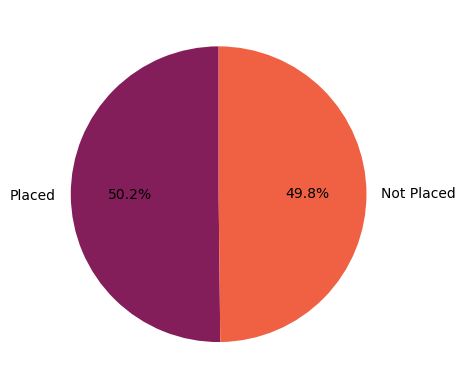

In [89]:
placement_percentage.plot(kind="pie",
                          startangle = 90,
                          autopct='%1.1f%%',
                          colors = sns.color_palette('rocket' , n_colors=len(placement_percentage)),
                          ylabel=''
                          )

Top 5 Higher Education destinantions


In [25]:
top_country = df['destination_country'].value_counts().sort_values().head(10).reset_index()
top_country

,destination_country,count
0,Ireland,472
1,Finland,474
2,Canada,483
3,USA,485
4,India,493
5,South Africa,496
6,Russia,515
7,Germany,518
8,UK,526
9,UAE,538


<Figure size 800x500 with 0 Axes>

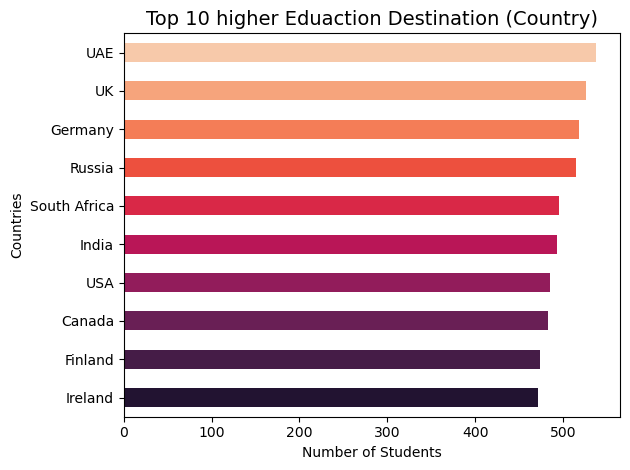

In [40]:
plt.figure(figsize=(8,5))

top_country.plot(
  kind="barh",
  x="destination_country",
  y ="count",
  color= sns.color_palette('rocket' , n_colors=len(top_country)),
  legend=False
)

plt.title("Top 10 higher Eduaction Destination (Country)" ,fontsize =14)
plt.ylabel('Countries')
plt.xlabel('Number of Students')
plt.tight_layout()
plt.show()

Top field of Study

In [27]:
field_count = df['field_of_study'].value_counts().sort_values(ascending=False).reset_index()
field_count.columns = ['field_of_study' , 'count']

total_students = len(df)
field_count['percentage'] = (field_count['count'] / total_students)*100
field_count

,field_of_study,count,percentage
0,Social Sciences,645,12.90
1,Business,636,12.72
2,Engineering,634,12.68
3,Law,633,12.66
4,Computer Science,630,12.60
5,Natural Sciences,629,12.58
6,Arts,600,12.00
7,Medicine,593,11.86


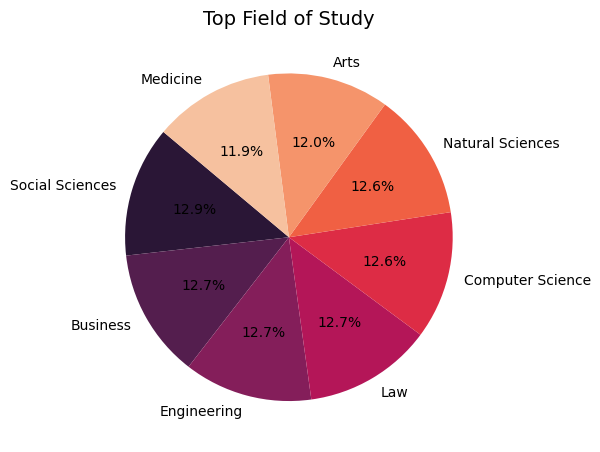

In [88]:
plt.figure(figsize=(6,6))

field_count['percentage'].plot(
    kind='pie',
    labels= field_count['field_of_study'],                            
    startangle=140,         
    autopct='%1.1f%%',
    colors=sns.color_palette('rocket' , n_colors=len(field_count)),
)

plt.ylabel('')
plt.title("Top Field of Study" , fontsize  =14)
plt.tight_layout()
plt.show()

Field of Study v/s Placement status

In [104]:
fos_placement_pivot = df.pivot_table( index='field_of_study',
                                      columns= 'placement_status',
                                      values= 'student_id',
                                      aggfunc = 'count')

fos_placement_pivot = fos_placement_pivot.sort_values(by='Placed' , ascending=False)
fos_placement_pivot

placement_status,Not Placed,Placed
field_of_study,,
Engineering,286,348
Social Sciences,312,333
Law,314,319
Natural Sciences,315,314
Computer Science,320,310
Business,330,306
Arts,295,305
Medicine,319,274


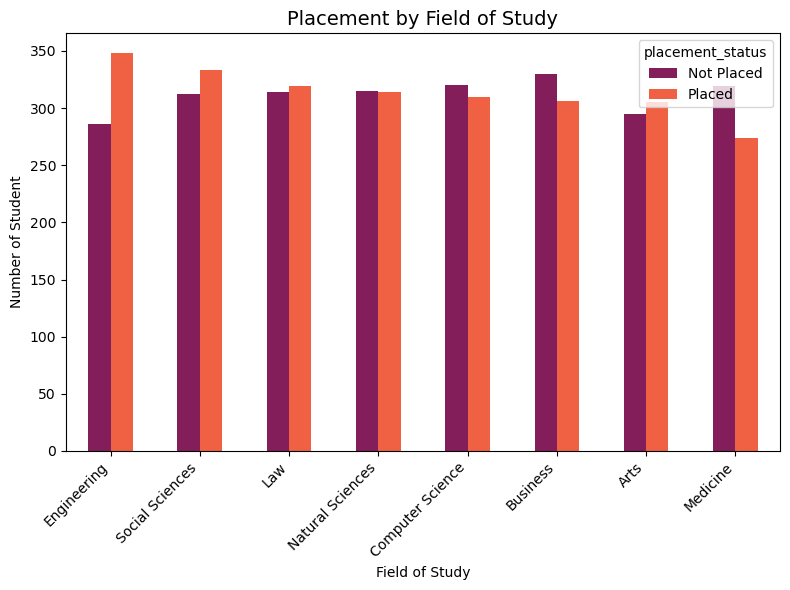

In [106]:
fos_placement_pivot.plot(kind='bar' ,figsize=(8,6) , color = sns.color_palette('rocket' , n_colors=2))

plt.title('Placement by Field of Study' , fontsize =14)
plt.xlabel('Field of Study')
plt.ylabel('Number of Student')
plt.xticks(rotation=45 ,ha = 'right')
plt.tight_layout()
plt.show()

Top University by Placement

In [53]:
uni_placement = df.pivot_table(
    index='university_name',
    columns='placement_status',
    values='student_id',
    aggfunc='count',
    fill_value=0
)

uni_placement

placement_status,Not Placed,Placed
university_name,,
Aalto University,36,31
American University of Sharjah,31,36
BITS Pilani,27,34
Bauman Moscow State Technical University,34,46
Columbia University,37,33
...,...,...
University of Turku,28,38
University of the Witwatersrand,42,30
Western University,29,29


<Figure size 800x1200 with 0 Axes>

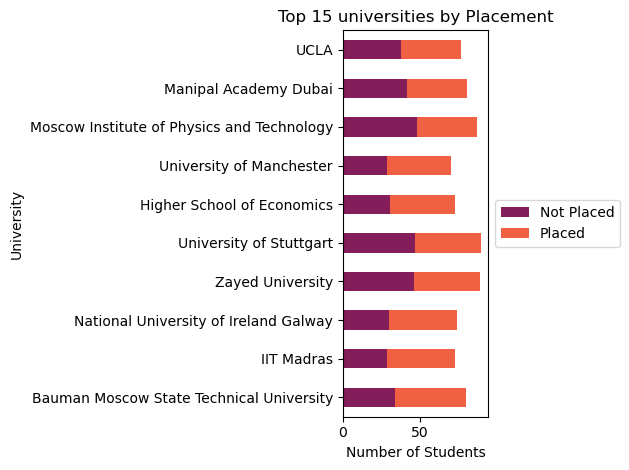

In [76]:
top_unis = uni_placement.sort_values(by='Placed' , ascending=False).head(10)

plt.figure(figsize=(8,12))
top_unis.plot(kind= 'barh',
              stacked=True,
              color = sns.color_palette('rocket' , n_colors=2))
plt.title("Top 15 universities by Placement")
plt.ylabel("University")
plt.xlabel("Number of Students")
plt.legend(loc = 'center left' , bbox_to_anchor = (1,0.5))

plt.tight_layout()
plt.show()

Visa Comparison

In [79]:
visa_count = df['visa_status'].value_counts()
visa_percentage = (visa_count / total_students)*100

visa_percentage

visa_status
Schengen Student Visa    17.26
Tier 4                   17.06
J1                       16.96
Student Visa             16.34
Study Permit             16.22
F1                       16.16
Name: count, dtype: float64

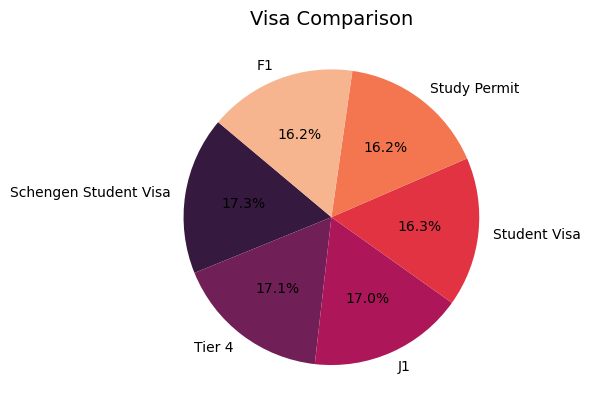

In [131]:
visa_percentage.plot( kind = 'pie',
                      startangle = 140,
                      ylabel= '',
                      autopct='%1.1f%%',
                      colors = sns.color_palette('rocket' , n_colors=len(visa_percentage)),)

plt.title("Visa Comparison" , fontsize=14)
plt.show()


University v/s Salary 

In [125]:
univeristy_salary = df.groupby('university_name')['starting_salary_usd'].median().sort_values(ascending=False).head(5)
univeristy_salary

university_name
NIT Trichy                  58571.0
Queen's University          57484.0
IIT Bombay                  56891.0
UC Berkeley                 54270.5
University of Birmingham    53741.0
Name: starting_salary_usd, dtype: float64

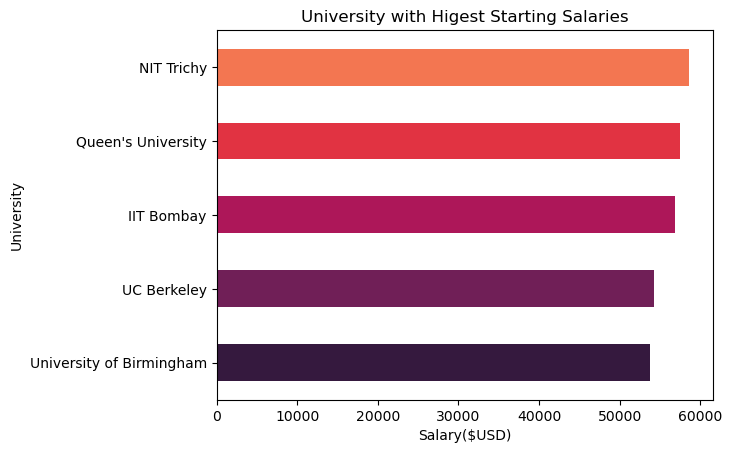

In [128]:
univeristy_salary[::-1].plot(kind='barh',
                    color = sns.color_palette('rocket'))

plt.title('University with Higest Starting Salaries')
plt.xlabel('Salary($USD)')
plt.ylabel('University')
plt.show()

Year : Comparison


In [ ]:
yearly_students = df.groupby('year_of_enrollment')['student_id'].count()
yearly_students

<Axes: xlabel='year_of_enrollment'>

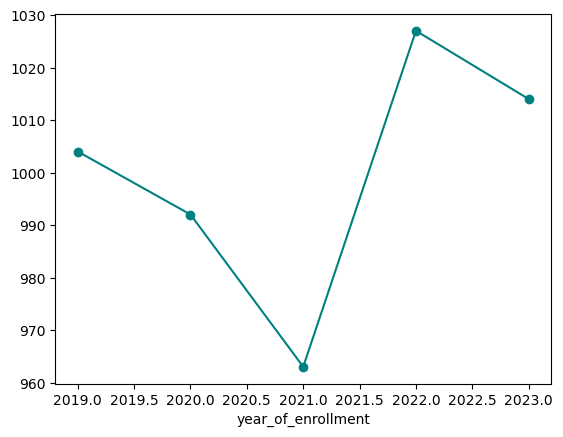

In [ ]:
plt.plot( kind= 'line' ,
                      marker = 'o',
                      color = 'teal')